# Dense vs Convolutional Neural Networks


In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt

torch.random.manual_seed(0)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cpu


Link to the data:
https://drive.google.com/file/d/1j9QSpZHua5KP_Bw2iP8CD9c0ewjHYobQ/view?usp=sharing

_(this is a subset of "skin-cancer-mnist-ham10000")_


Read the CSV file and display the first few rows of the data.

In [4]:
os.listdir()
os.getcwd()
os.chdir('..')
os.getcwd()

'c:\\Users\\PaulDubois\\Documents\\Pro\\DeepLearningCourse2025'

In [7]:
os.listdir('data/HAM2000')


['bcc', 'bkl', 'mel', 'metadata.csv', 'nv']

In [9]:
df = pd.read_csv('data/HAM2000/metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0006518,ISIC_0027618,nv,follow_up,35.0,male,back
1,HAM_0004666,ISIC_0029165,nv,follow_up,55.0,male,upper extremity
2,HAM_0006455,ISIC_0029690,nv,follow_up,50.0,male,lower extremity
3,HAM_0003653,ISIC_0030139,nv,histo,45.0,male,back
4,HAM_0001330,ISIC_0026818,nv,histo,20.0,female,abdomen


In [13]:
df.dx.unique()

array(['nv', 'mel', 'bcc', 'bkl'], dtype=object)

Create a dataset with a transformation to resize the images to 64x64 pixels.

Add data augmentation (random horizontal/vertical flip) to the dataset.

In [48]:
transfo = transforms.Compose([
    transforms.Resize( (64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor()
])

dataset = torchvision.datasets.ImageFolder(root='data/HAM2000', transform=transfo)
class_names = dataset.find_classes('data/HAM2000')[0]
dataset[0][0].shape

torch.Size([3, 64, 64])

In [105]:
class_number = dataset.find_classes('data/HAM2000')[1]
class_number

{'bcc': 0, 'bkl': 1, 'mel': 2, 'nv': 3}

In [47]:
class_names

['bcc', 'bkl', 'mel', 'nv']

Split the dataset into training and test sets.

Create dataloaders for the training and test sets.

In [53]:
train_set, test_set = torch.utils.data.random_split(dataset,
                                                    [int(0.7*len(dataset)),int(0.3*len(dataset))]
                                                    )
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=64,
    shuffle=True
)

test_dataloader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=64,
    shuffle=False
)

Text(0.5, 1.0, 'bcc')

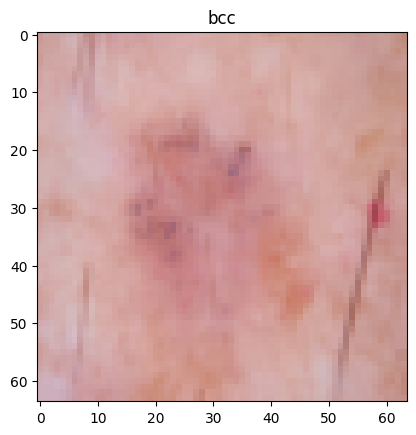

In [60]:
dataset[0][0]
plt.imshow(dataset[0][0].permute(1,2,0))
plt.title(f'{class_names[dataset[0][1]]}')

### Linear Model

Create a linear model with two hidden layer.

In [68]:
class Test(object):
    def __init__(self, *args, **kwargs):
        print("args:", args)
        print("kwargs:", kwargs)

t = Test(1, 'ba', arg1=4, arg2="av", testing=2.5)
t

args: (1, 'ba')
kwargs: {'arg1': 4, 'arg2': 'av', 'testing': 2.5}


In [70]:
class linearNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc0 = nn.Linear(64*64*3,200)
        self.fc1 = nn.Linear(200,100)
        self.fc2 = nn.Linear(100,4)

    def forward(self,x):
        x = x.view(-1, 3*64*64)
        l1 = nn.ReLU()(self.fc0(x))
        l2= nn.ReLU()(self.fc1(l1))
        y= nn.Softmax(dim=1)(self.fc2(l2))
        return y


Create a loss function and an optimizer.

In [72]:
model = linearNN()
optimizer = optim.Adam(model.parameters(), lr = 10**(-4))
criterion = nn.CrossEntropyLoss()




Write the training loop.

In [74]:
n_epochs = 10
for nbr in range(n_epochs):
    total_loss_epoch: float =0
    total_correct = 0
    for X_train, y_train in train_dataloader:
        optimizer.zero_grad()
        output = model(X_train)
        total_correct += (output.argmax(axis=1) == y_train).sum().item()
        loss = criterion(output, y_train)
        total_loss_epoch += loss.item()
        loss.backward()
        optimizer.step()
    print(total_loss_epoch, total_correct/(0.7*len(dataset)))


C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_14296\130628223.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y= nn.Softmax()(self.fc2(l2))


27.448557376861572 0.4785714285714286
27.252655148506165 0.49857142857142855
27.28230381011963 0.48642857142857143
27.219918847084045 0.4878571428571429
27.134632229804993 0.4907142857142857
27.039032101631165 0.4957142857142857
26.935754418373108 0.51
26.936164617538452 0.49642857142857144
26.95622730255127 0.49642857142857144
26.80065655708313 0.5142857142857142


Plot the loss and accuracy through epochs.

Test the model on a few images of the test set.

Compute the accuracy of the model on the test set.

### Conv Model

Create a convolutional model with a few convolutional layers and two linear layers (for the classification).

In [ ]:
# torch.randn(3, 64,64))

In [80]:
nn.Conv2d(3,1,11)(torch.randn(3, 64,64)).shape

torch.Size([1, 54, 54])

In [85]:
class convoluNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,11)
        self.conv2 = nn.Conv2d(6,10,9)
        self.conv3 = nn.Conv2d(10,14,7)
        self.fc1 = nn.Linear(40*40*14,4)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = nn.ReLU()(self.conv3(x))
        x = x.view(-1, 14*40*40)
        y = nn.Softmax(dim=1)(self.fc1(x))
        # print(y.shape)
        return y

m = convoluNN()
m(torch.randn(3, 64,64))

tensor([[0.2506, 0.2430, 0.2661, 0.2404]], grad_fn=<SoftmaxBackward0>)

Create a loss function and an optimizer.

In [86]:
model = convoluNN(

)
optimizer = optim.Adam(model.parameters(),lr = 10**(-4))
criterion = nn.CrossEntropyLoss()

Write the training loop.

In [87]:
n_epochs = 10
for epoch in range(n_epochs):
    total_loss_epochs: float = 0
    for X_train,y_train in train_dataloader:
        output = model(X_train)
        optimizer.zero_grad()
        loss = criterion(output,y_train)
        total_loss_epochs += loss.item()
        loss.backward()
        optimizer.step()
    print(total_loss_epochs)

30.39714241027832
29.692395567893982
28.555655479431152
27.89175045490265
27.589106559753418
27.404749035835266
27.207316875457764
27.0980943441391
26.912716150283813
26.816359877586365


In [94]:
m = linearNN()
total = 0
for param in m.parameters():
    c = 1
    for a in list(param.shape):
        c *= a
    total += c
print(total)


2478304


In [93]:
total = 0
for param in model.parameters():
    c = 1
    for a in list(param.shape):
        c *= a
    total += c
print(total)


103532


Plot the loss and accuracy through epochs.

Test the model on a few images of the test set.

Compute the accuracy of the model on the test set.

Compare the training time and accuracy of the two models.

-----

BONUS: Create a custom dataset and return the image, the class, and some tabular data from the CSV file.

You may use the 'bis' version of the dataset for this task: https://drive.google.com/file/d/1YIcfChTKgDHyr4XMaxuCFYWtRVo_fNbN/view?usp=sharing

In [102]:
df = pd.read_csv('data/HAM2000bis/metadata.csv')
df.columns
df.image_id
df['image_id'][2]
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0006518,ISIC_0027618,nv,follow_up,35.0,male,back
1,HAM_0004666,ISIC_0029165,nv,follow_up,55.0,male,upper extremity
2,HAM_0006455,ISIC_0029690,nv,follow_up,50.0,male,lower extremity
3,HAM_0003653,ISIC_0030139,nv,histo,45.0,male,back
4,HAM_0001330,ISIC_0026818,nv,histo,20.0,female,abdomen
...,...,...,...,...,...,...,...
1995,HAM_0000933,ISIC_0024358,bkl,histo,60.0,female,back
1996,HAM_0004673,ISIC_0029418,bkl,histo,50.0,male,back
1997,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown
1998,HAM_0004494,ISIC_0031459,bkl,histo,60.0,female,neck


In [120]:
os.getcwd()

'c:\\Users\\PaulDubois\\Documents\\Pro\\DeepLearningCourse2025'

In [128]:
import torch.utils
import torch.utils.data
from PIL import Image

class CustomData(torch.utils.data.Dataset):
    def __init__(self, path, transfo=None):
        self.path = path
        self.df = pd.read_csv(path+'metadata.csv')
        self.class_to_nb = {'bcc': 0, 'bkl': 1, 'mel': 2, 'nv': 3}
        self.transfo = transfo
    def __len__(self):
        return len(self.df)
    def __getitem__(self,i):
        c = self.class_to_nb[self.df['dx'][i]]
        age = self.df['age'][i]
        sex = self.df['sex'][i]
        img_name = self.df['image_id'][i]
        im = Image.open(self.path+'images/'+img_name+'.jpg')
        if self.transfo is not None:
            im = self.transfo(im)
        return im, age, sex, c

transfo = transforms.Compose([
    transforms.Resize( (64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor()
])

data = CustomData('data/HAM2000bis/', transfo=transfo)
data[0]

(tensor([[[0.7373, 0.7412, 0.7490,  ..., 0.7686, 0.7569, 0.7451],
          [0.7373, 0.7451, 0.7569,  ..., 0.7647, 0.7608, 0.7529],
          [0.7451, 0.7451, 0.7490,  ..., 0.7686, 0.7647, 0.7529],
          ...,
          [0.7804, 0.7922, 0.8000,  ..., 0.8314, 0.8275, 0.8078],
          [0.7922, 0.7882, 0.7961,  ..., 0.8275, 0.8196, 0.8157],
          [0.8000, 0.7882, 0.8000,  ..., 0.8314, 0.8235, 0.8196]],
 
         [[0.3765, 0.3765, 0.3961,  ..., 0.4667, 0.4549, 0.4549],
          [0.3765, 0.3882, 0.4039,  ..., 0.4549, 0.4667, 0.4667],
          [0.3922, 0.3882, 0.3882,  ..., 0.4588, 0.4706, 0.4627],
          ...,
          [0.4000, 0.4118, 0.4118,  ..., 0.4902, 0.4863, 0.4627],
          [0.4196, 0.3961, 0.4000,  ..., 0.4863, 0.4706, 0.4627],
          [0.4314, 0.3961, 0.4039,  ..., 0.4824, 0.4667, 0.4588]],
 
         [[0.4235, 0.4235, 0.4392,  ..., 0.4588, 0.4431, 0.4392],
          [0.4196, 0.4275, 0.4431,  ..., 0.4471, 0.4510, 0.4549],
          [0.4353, 0.4314, 0.4353,  ...,

Create a model that uses the tabular data and the image to predict the class.

Create a loss function and an optimizer.

Write the training loop.

Plot the loss and accuracy through epochs.

Test the model on a few images of the test set.

Compute the accuracy of the model on the test set.